In [1]:
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install pandas
!python -m pip install ipywidgets

In [1]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from ipywidgets import interact
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from matplotlib.animation import FuncAnimation, ArtistAnimation


In [2]:
# Создание функций
# Модель с переходом из D в S
def seird_model(t, y, N, a, tau, a_I, a_E, gamma, p, k, rho, beta):
    S, E, I, R = y
    dS_dt = -(a_I * S * I / N + a_E * S * E / N) + gamma * R
    # возможна ошибка из-за время - тау, тк возможен выход за границы массива
    # или просто аномальные числа (0 - 1) = -1
    dE_dt = (a_I * S * I / N + a_E * S * E / N) - (p * k + (1 - p) * rho) * E
    dI_dt = p * k * E - beta * I
    dR_dt = beta * I + (1 - p) * rho * E -  gamma * R
    return dS_dt, dE_dt, dI_dt, dR_dt
    
def interact_sir(a=1, tau=1, a_I=.5, a_E=.5, gamma=.5, p=.5, k=.5, rho=.5, beta=.5):
    
    T = 150 # Время моделирования 
    sol = integrate.solve_ivp(lambda t, y: seird_model(t, y, N, a, tau, a_I, a_E, gamma,
                                                       p, k, rho, beta),
                              [0, T], [S0, E0, I0, R0], dense_output=True)
    
    t = np.linspace(0, T, T)
    y = sol.sol(t)
    S, E, I, R = y[0, :], y[1, :], y[2, :], y[3, :]
    plt.plot(t, S, color='b', label='Susceptible / Восприимчивые')
    plt.plot(t, E, color='m', label='Exposed  / Латентные')
    plt.plot(t, I, color='r', label='Infected / Инфицированные')
    plt.plot(t, R, color='g', label='Recovered / Невосприимчивые')
    plt.xlabel('t - Время')
    plt.ylabel('N - Популяция')
    plt.legend()
    plt.grid()
    plt.show()

Придумать как создать аргумент а(т-тау), как вариант - создать фунцкию

In [3]:
# Начальные параметры
N = 200000 # Общее количество индивидуумов;
p = .5   # Вероятность, что индивидуум верит новости;

a = 1    # индекс влияния социальной изоляции на инфодемию — (0,1);
tau = 1     # «невидимый» период — 24 часа - 1 день; 
rho = .5   # средняя скорость потери интереса — (0, 1); 
beta = .5  # скорость потери интереса к слуху — (0, 1); 
gamma = .5 # скорость повторного «заражения» слухом — 0,25;

a_I = .5   # параметр распространения слухов между инфицированными индивидуумами и 
            # уязвимыми индивидуумами, который связан с социальными факторами — (0, 1); 

a_E = .5   # параметр заражения между «дозревающими» зараженными индивидуумами и 
            # уязвимыми индивидуумами — (0, 1); 

k = .5     # частота перехода из невосприимчивых в уязвимые индивидуумы — (0, 1). 

E0 = 0
I0 = 100
R0 = 0
S0 = N - E0 - I0 - R0

In [4]:
interact(interact_sir, 
         a_I = (0, 1, .01),
         a_E = (0, 1, .01), 
         gamma = (0, 1, .01), 
         p = (0, 1, .01), 
         k = (0, 1, .01), 
         rho = (0, 1, .01), 
         beta = (0, 1, .01))

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), IntSlider(value=1, description='tau'…

<function __main__.interact_sir(a=1, tau=1, a_I=0.5, a_E=0.5, gamma=0.5, p=0.5, k=0.5, rho=0.5, beta=0.5)>

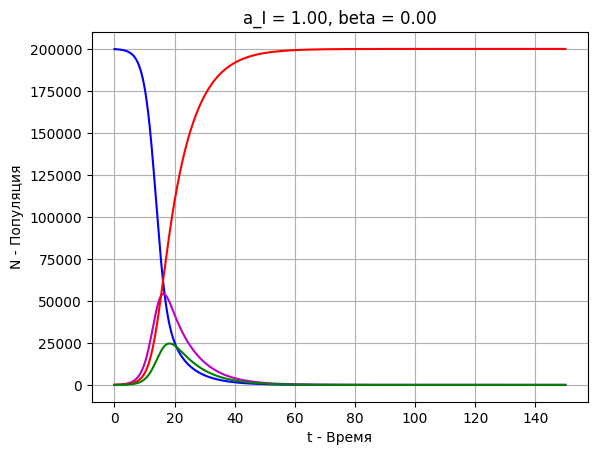

In [5]:
# Образец изменения параметров (настройка анимации) 

def animate(i, t, ax):
    # Ввод параметров (любое количество до количества параметров в S(-E)IR(-D)_model В нашем случае ~ 10)
    # Лучше вводить новые переменные вместо "p" -> "p_val" or "p_value", но это не обязательно
    a_I_val = max(0, min(1, 1 - i * 0.02))
    beta_val = max(0, min(1, 0 + i * 0.01))

    # Здесь мы пишем изменённые переменные в sol = ... 
    sol = integrate.solve_ivp(lambda t, y: seird_model(t, y, N, a, tau, a_I_val, a_E, gamma,
                                                       p, k, rho, beta_val),
                              [0, T], [S0, E0, I0, R0], dense_output=True)
    y = sol.sol(t)
    S, E, I, R = y[0, :], y[1, :], y[2, :], y[3, :]

    ax.clear()
    ax.plot(t, S, color='b', label='S - Восприимчивые')
    ax.plot(t, E, color='m', label='E - Обдумывающие')
    ax.plot(t, I, color='r', label='I - Дезинформированные распространители')
    ax.plot(t, R, color='g', label='R - Невосприимчивые')
    ax.set_xlabel('t - Время')
    ax.set_ylabel('N - Популяция')
    # данная строчка просто пишет сверху параметры и их значения в каждый момент
    ax.set_title(f'a_I = {a_I_val:.2f}, beta = {beta_val:.2f}')
    plt.grid()


# Определение временного массива
T = 150
t = np.linspace(0, T, 1000)

# Инициализация
fig, ax = plt.subplots()

# Создание анимации, frames=50 количество кадров, interval=100 скорость анимации 
ani = FuncAnimation(fig, animate, frames=50, interval=100, repeat=False, fargs=(t, ax))

# Отображение анимации в Jupyter Notebook
HTML(ani.to_jshtml())

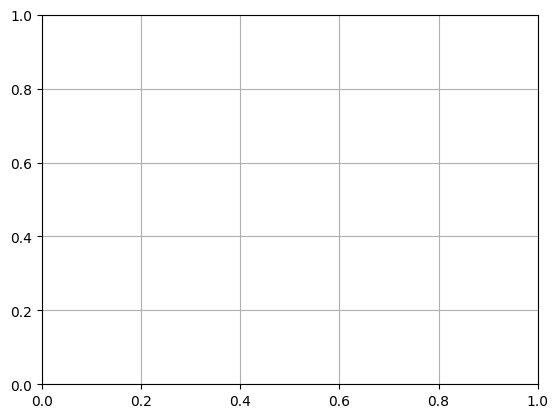

In [7]:
# Сохранение анимации
ani.save('animation_SEIR.gif', writer='pillow', fps=15)